In [244]:
import numpy as np
import asset_calculations
import bond_calculations

In [245]:
nominal = 100
coupon = 0.05
ytm = 0.07
maturity = 10
freq = 2

In [246]:
price = bond_calculations.bond_price(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)
price = 100.1559

In [247]:
bond_calculations.bond_duration(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

(7.797649249801265, 7.53396062782731)

In [248]:
bond_calculations.bond_convexity(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

70.00774929491187

In [249]:
bond_calculations.bond_ytm(nominal=nominal, market_price=price, coupon=coupon, maturity=maturity)

0.04980527678674473

---
## taylor series approximation

$$\frac{ΔP}{P} = -D \cdot \Delta y + \frac{1}{2} \cdot C \cdot (y^2)$$


In [261]:
def adjusted_bond_price(nominal: float, coupon: float, ytm: float, maturity: int, freq: int=2, yield_changes: list=[-0.15, 0.15, 0.0001]):
    yield_changes = np.arange(yield_changes[0], yield_changes[1], yield_changes[2])
    
    duration = bond_calculations.bond_duration(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)[1]
    conv = bond_calculations.bond_convexity(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

    bond_prices = []

    for i in yield_changes:
        one = -duration * i
        two = 1/2 * conv * (i ** 2)
        three = (one + two)
        four = three + 1
        
        bond_value = four * price
        
        bond_prices.append([i.round(3), bond_value])
        
    return bond_prices, yield_changes



In [266]:
bond_prices, yield_changes = adjusted_bond_price(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2, yield_changes=[-0.15, 0.15, 0.005])

In [267]:
bond_prices

[[-0.15, 292.2229938847619],
 [-0.145, 283.2790201095542],
 [-0.14, 274.51033856278667],
 [-0.135, 265.91694924445926],
 [-0.13, 257.4988521545721],
 [-0.125, 249.25604729312505],
 [-0.12, 241.18853466011814],
 [-0.115, 233.29631425555144],
 [-0.11, 225.57938607942486],
 [-0.105, 218.03775013173845],
 [-0.1, 210.6714064124922],
 [-0.095, 203.48035492168606],
 [-0.09, 196.4645956593201],
 [-0.085, 189.62412862539432],
 [-0.08, 182.95895381990871],
 [-0.075, 176.46907124286324],
 [-0.07, 170.15448089425792],
 [-0.065, 164.01518277409272],
 [-0.06, 158.05117688236774],
 [-0.055, 152.2624632190829],
 [-0.05, 146.6490417842382],
 [-0.045, 141.21091257783365],
 [-0.04, 135.9480755998693],
 [-0.035, 130.86053085034507],
 [-0.03, 125.94827832926099],
 [-0.025, 121.21131803661707],
 [-0.02, 116.64964997241334],
 [-0.015, 112.26327413664973],
 [-0.01, 108.0521905293263],
 [-0.005, 104.01639915044302],
 [0.0, 100.1558999999999],
 [0.005, 96.47069307799693],
 [0.01, 92.96077838443412],
 [0.015, 89

(Text(0.5, 0, 'change in rates'), Text(0, 0.5, 'bond price'))

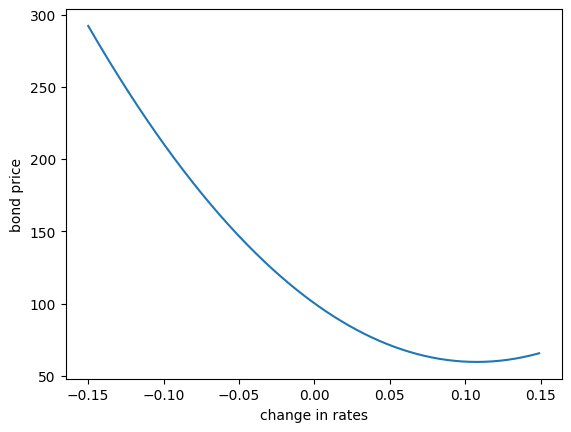

In [213]:
import matplotlib.pyplot as plt

plt.plot(yield_changes, bond_prices)
plt.xlabel("change in rates"), plt.ylabel("bond price")

In [234]:
tt = []

tt.append((3, 5))
tt.append((34, 5))

In [235]:
tt

[(3, 5), (34, 5)]

3